In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
N = 1000

# Generate a random N-vector of standard normal distribution, then multiply by N
a = np.random.randn(N)

# Create a positive semidefinite matrix A
A = np.outer(a, a)

def f(x):
    return A*x

x = np.random.randn(N)

def f(x): 
    return np.dot(x, np.dot(A, x))

def grad_f(x):
    return 2*np.dot(x, A)

def hess_f(x):
    return 2*A

In [3]:
y = np.random.randn(N)

print(f(y))
print(np.linalg.norm(grad_f(y)))

145.917718828
736.983644233


In [4]:
# Gradient descent
def gradient_descent(f, grad_f, x_init, eta, tolerance, verbose=False):
    x_history = []

    x_old = x_init
    x_history.append(x_old)

    counter = 0

    while np.linalg.norm(grad_f(x_old)) > tolerance:
        x_new = x_old - eta*grad_f(x_old)
        x_history.append(x_new)

        x_old = x_new
        counter += 1

        if verbose and counter % 100 == 0:
            print(counter, f(x_old))
    
    return counter, x_history

num_iterations, x_history = gradient_descent(f, grad_f, x_init=np.random.randn(N), eta=0.1/N, tolerance=1e-9)

In [5]:
# Track function value per iteration
f_history = [f(x) for x in x_history]

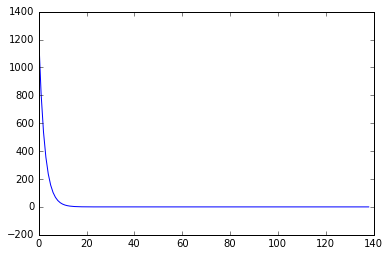

In [6]:
plt.plot(list(range(num_iterations+1)), f_history)

In [7]:
# Gradient descent
def momentum_GD(f, grad_f, x_init, eta, mu, tolerance, verbose=False):
    x_history, v_history = [], []
    
    x_old = x_init
    v_old = np.random.randn(len(x_init))
    
    x_history.append(x_old)
    v_history.append(v_old)

    counter = 0

    while np.linalg.norm(grad_f(x_old)) > tolerance:
        v_new = mu*v_old - eta*grad_f(x_old)
        x_new = x_old + v_new
        
        x_history.append(x_new)
        v_history.append(v_new)
        
        x_old = x_new
        v_old = v_new
        
        counter += 1

        if verbose and counter % 100 == 0:
            print(counter, f(x_old))
    
    return counter, x_history, v_history

n_iters, x_history, v_history = momentum_GD(f, grad_f, x_init=np.random.randn(N), eta=0.1/N, 
                                            mu=0.5, tolerance=1e-9)

print(n_iters)

69


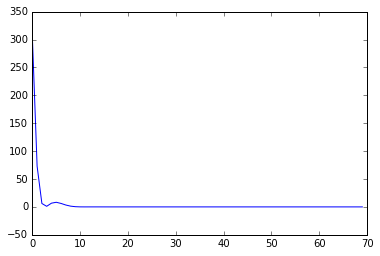

In [8]:
f_history = [f(x) for x in x_history]

plt.plot(list(range(n_iters+1)), f_history)

In [13]:
#######################
#  RUN AN EXPERIMENT  #
#######################

import time

# For different values of N, plot the number of iterations required for convergence of regular
# gradient descent and momentum-based gradient descent

n_values = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000,
            2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

iterations = []
iterations_mgd = []

runtime = []
runtime_mgd = []

num_trials = 10

for n in n_values:
    # Run gradient descent 100 times
    n_iters = [0]*num_trials
    comp_time = [0]*num_trials
    
    for i in range(num_trials):
        # Generate a random n-vector of standard normal distribution, then multiply by N
        a = np.random.randn(n)

        # Create a positive semidefinite matrix A
        A = np.outer(a, a)

        def f(x): 
            return np.dot(x, np.dot(A, x))

        def grad_f(x):
            return 2*np.dot(x, A)

        def hess_f(x):
            return 2*A
        
        t0 = time.clock()
        
        n_iters[i], _ = gradient_descent(f, grad_f, x_init=np.random.randn(n), eta=0.1/n, 
                                         tolerance=1e-9)
        
        t = time.clock()
        
        comp_time[i] = t - t0
        
    # Run momentum-based gradient descent 100 times
    n_iters_mgd = [0]*num_trials
    comp_time_mgd = [0]*num_trials
    
    for i in range(num_trials):
        # Generate a random n-vector of standard normal distribution, then multiply by N
        a = np.random.randn(n)

        # Create a positive semidefinite matrix A
        A = np.outer(a, a)

        def f(x): 
            return np.dot(x, np.dot(A, x))

        def grad_f(x):
            return 2*np.dot(x, A)

        def hess_f(x):
            return 2*A
        
        t0 = time.clock()
        
        n_iters_mgd[i], _, _ = momentum_GD(f, grad_f, x_init=np.random.randn(n), eta=0.1/n, 
                                           mu=0.5, tolerance=1e-9)
    
        t = time.clock()
        
        comp_time_mgd[i] = t - t0
    
    iterations.append(np.mean(n_iters))
    runtime.append(np.mean(comp_time))
    
    iterations_mgd.append(np.mean(n_iters_mgd))
    runtime_mgd.append(np.mean(comp_time_mgd))
    
    print(n, np.mean(n_iters), np.mean(n_iters_mgd))

100 116.7 71.2
200 116.4 73.5
300 117.9 75.4
400 122.0 77.0
500 118.7 78.3
600 124.1 78.8
700 125.3 78.1
800 122.1 78.6
900 127.2 75.6
1000 123.3 80.6
2000 127.9 80.8
3000 130.6 80.1
4000 130.1 83.1
5000 135.1 83.3
6000 132.2 84.1
7000 132.7 84.7
8000 135.7 86.3
9000 133.6 85.2
10000 135.4 86.9


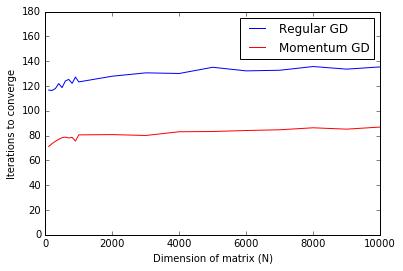

In [24]:
plt.plot(n_values, iterations, 'b-', label="Regular GD")
plt.plot(n_values, iterations_mgd, 'r', label="Momentum GD")
plt.xlabel("Dimension of matrix (N)")
plt.ylabel("Iterations to converge")
plt.ylim((0, 180))
plt.legend()

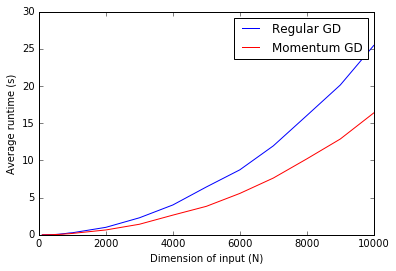

In [19]:
plt.plot(n_values, runtime, 'b-', label='Regular GD')
plt.plot(n_values, runtime_mgd, 'r-', label='Momentum GD')
plt.xlabel("Dimension of input (N)")
plt.ylabel("Average runtime (s)")
plt.legend()

In [63]:
# Hessian optimization
def hessian_opt(f, grad_f, x_init, eta, tolerance, verbose=False):
    x_history = []

    x_old = x_init
    x_history.append(x_old)

    counter = 0

    while np.linalg.norm(grad_f(x_old)) > tolerance:
        x_new = x_old - eta*np.dot(np.linalg.inv(hess_f(x_old)), grad_f(x_old))
        x_history.append(x_new)

        x_old = x_new
        counter += 1

        if verbose and counter % 100 == 0:
            print(counter, f(x_old))
    
    return counter, x_history

num_iterations, x_history = hessian_opt(f, grad_f, x_init=np.random.randn(N), eta=0.1/N, tolerance=1e-9)

KeyboardInterrupt: 